Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’  
● As a business manager, try to find out the weak areas where you can  
work to make more profit.  
● What all business problems you can derive by exploring the data?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.shape

(9994, 13)

In [6]:
df.rename(columns={'Ship Mode':'Ship_Mode','Postal Code':'Postal_Code'},inplace=True)

In [7]:
cat=[col for col in df.columns if df[col].dtype == 'object']
for i in cat:
    print( "\033[1m"+i)
    print('\033[0m')
    print(df[i].value_counts())
    print('==========================')


Ship_Mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64
Segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
Country

United States    9994
Name: Country, dtype: int64
City

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Pico Rivera        1
Tinley Park        1
Margate            1
Redding            1
Palatine           1
Name: City, Length: 531, dtype: int64
State

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado               

<AxesSubplot:xlabel='Ship_Mode'>

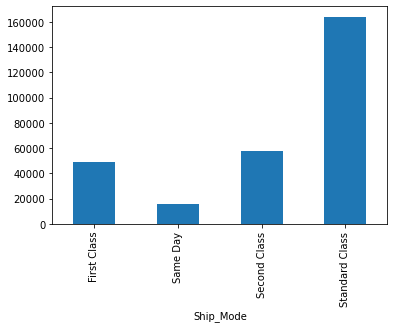

In [55]:
df.groupby(['Ship_Mode'])['Profit'].sum().plot(kind='bar')

__Standard Class mode is making most of the profit__

<AxesSubplot:xlabel='Ship_Mode'>

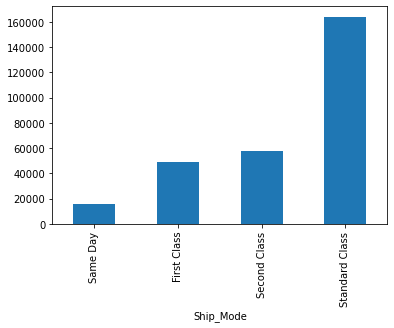

In [8]:
df.groupby('Ship_Mode')['Profit'].sum().sort_values().plot.bar()

<AxesSubplot:xlabel='Segment,Ship_Mode'>

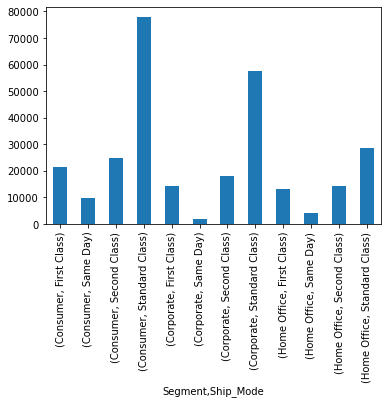

In [23]:
df.groupby(['Segment','Ship_Mode'])['Profit'].sum().plot.bar()

<AxesSubplot:xlabel='Segment'>

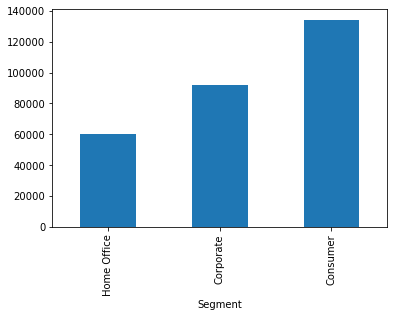

In [9]:
df.groupby('Segment')['Profit'].sum().sort_values().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

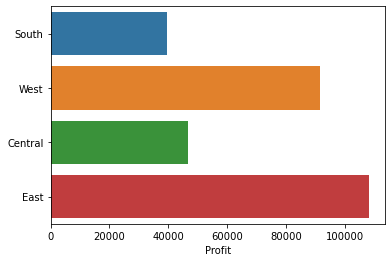

In [13]:
sns.barplot(df.groupby('Region')['Profit'].sum(),df['Region'].unique())

## Insights about Category and Sub category

<AxesSubplot:xlabel='Category'>

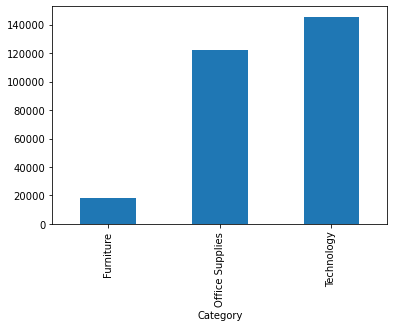

In [37]:
df.groupby(['Category'])['Profit'].sum().plot(kind='bar')

__Furntures are making the least profit on the other hand the items in Technolgy category are making highest profit.__

In [35]:
df.groupby(['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases       -3472.5560
                 Chairs          26590.1663
                 Furnishings     13059.1436
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6527.7870
                 Binders         30221.7633
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5546.2540
                 Paper           34053.5693
                 Storage         21278.8264
                 Supplies        -1189.0995
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44515.7306
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Sub-Category'>

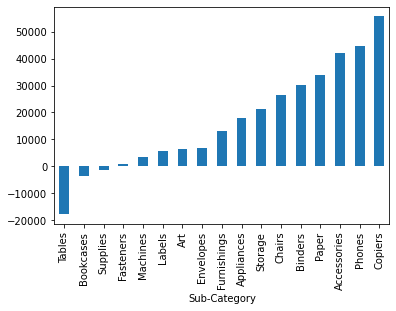

In [12]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot.bar()

__In Sub_Category of Furniture we are seeing that tables are making loss to the store where as in Technology the Copiers are making the most of the profit.__

# Area where we are having the highest profit to area where there is highest loss.

<AxesSubplot:ylabel='Ship_Mode,Segment,Region,Category,Sub-Category'>

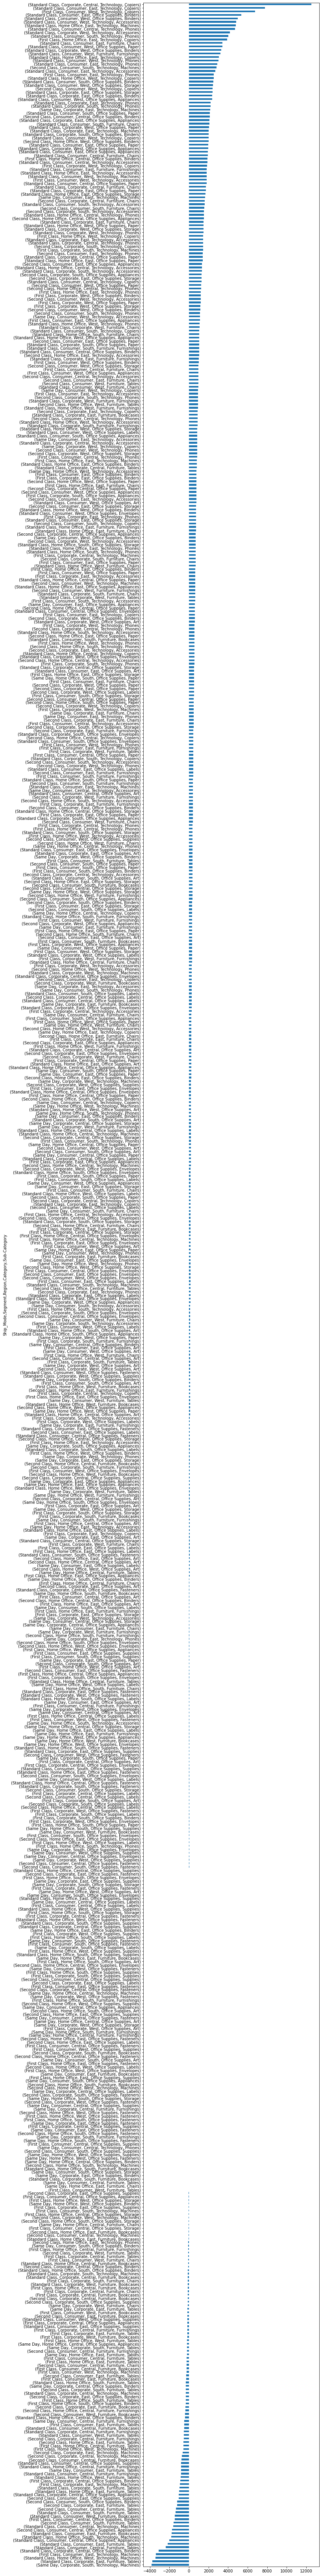

In [53]:
plt.figure(figsize=(8,120))
df.groupby(['Ship_Mode','Segment','Region','Category','Sub-Category'])['Profit'].sum().sort_values().plot(kind='barh')